# **Análisis de montos de préstamos según historial crediticio**

## **1. Introducción**

El objetivo principal es analizar si existen diferencias significativas en el monto promedio de los préstamos (`loan_amnt`) otorgados a individuos, según su historial crediticio previo (`cb_person_default_on_file`). Para llevar a cabo este análisis, se utilizará el conjunto de datos `credit_risk_dataset.csv`.

El desarrollo de este estudio se estructurará en varias etapas. Primero, se examinará la distribución del monto del préstamo para cada categoría de la variable `cb_person_default_on_file` (incumplimiento histórico 'Y' o 'N'), evaluando la simetría y normalidad de los datos, y presentando sus estadísticas descriptivas fundamentales. Posteriormente, se ofrecerá una perspectiva inicial sobre la igualdad de los montos promedio entre estas categorías, apoyada visualmente por un diagrama de caja y mediante el cálculo de intervalos de confianza del 95%. Finalmente, se realizará una prueba de hipótesis con un nivel de significancia del 5% para verificar formalmente las observaciones previas. Este análisis se ha realizado utilizando el software R en un entorno de Jupyter Notebook.

### **1.1. Descripción de los datos**

El proyecto se enfocará en dos columnas clave del dataset `credit_risk_dataset.csv`: `loan_amnt` y `cb_person_default_on_file`.
- `loan_amnt`: Representa el monto del préstamo.
- `cb_person_default_on_file`: Indica el historial de incumplimiento de pago de la persona, con valores 'Y' (sí) o 'N' (no).

## **2. Análisis de distribución**

### **2.1. Monto de prestamos para personas que tienen algún incumplimiento historico**
#### **2.1.1. Estadisticas descriptivas que nos ayudan a entender la distribucion de los datos**

In [29]:
library(moments) # Calculo de curtosis y asimetria

df <- read.csv("credit_risk_dataset.csv") # Importar dataset

df_Y <- subset(df, cb_person_default_on_file == 'Y')

media_Y <- mean(df_Y$loan_amnt)
mediana_Y <- median(df_Y$loan_amnt)
desv_est_Y <- sd(df_Y$loan_amnt)
curt_Y <- kurtosis(df_Y$loan_amnt)
asimetria_muestral_Y <- skewness(df_Y$loan_amnt)

aplicar_formato <- function(valor) {
    valor_con_formato <- formatC(valor, format="f", digits=2, big.mark=",", decimal.mark=".")
    return(paste0("$", valor_con_formato))
}

cat("Media =", aplicar_formato(media_Y), "\n")
cat("Mediana = ", aplicar_formato(mediana_Y), "\n")
cat("Desviacion estandar = ", aplicar_formato(desv_est_Y), "\n")
cat("Curtosis = ", curt_Y, "\n")
cat("Asimetria muestral = ", asimetria_muestral_Y)


Media = $10,123.36 
Mediana =  $8,400.00 
Desviacion estandar =  $6,853.53 
Curtosis =  3.773135 
Asimetria muestral =  1.051963

##### **Conclusiones**

- Notemos que la media es de $10,123.36 que es significativamente mayor que la mediana de $8,400.00 , lo que sugiere que la distribución está sesgada a la derecha.
- Notemos que la curtosis es de 3.77315, un valor positivo como este indica una distribución leptocúrtica, lo que significa que tiene colas más pesadas y un pico más pronunciado que una distribución normal
- La asimetría muestral es de 1.051963. Dado que este valor es positivo y considerablemente diferente de cero, la distribución está sesgada a la derecha (asimetría positiva). Esto significa que la cola de la distribución es más larga hacia los valores más altos, y la mayoría de los datos se agrupan en el lado izquierdo, lo que refuerza lo propuesto al analizar la media y la mediana.

### **2.1.2. Graficos para entender la distribucion de los datos**

##### **Gráfico de barras**

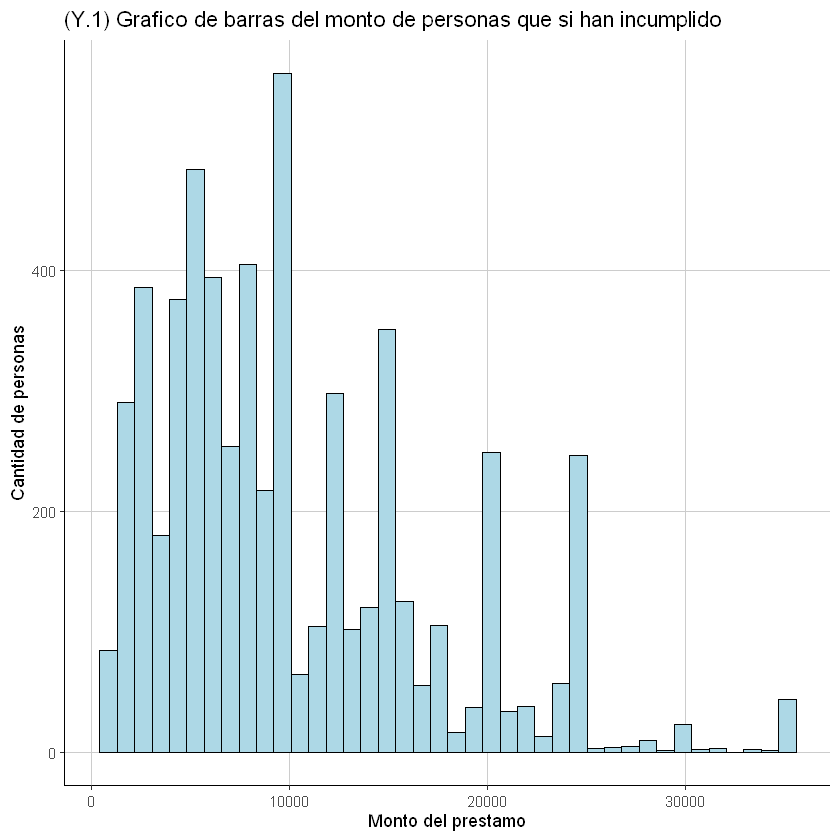

In [14]:
library(ggplot2)

hist_Y <- ggplot(df_Y, aes(x = loan_amnt)) +
  geom_histogram(bins = 40, fill = "lightblue", color = "black") +  # Color de barras y borde
  theme_classic() +  # Aplicar un tema clasico (con fondo blanco)
  theme(panel.grid.major = element_line(color = "gray80", size = 0.5)) + # Agregar cuadricula
  labs(
    title = '(Y.1) Grafico de barras del monto de personas que si han incumplido',
    x = 'Monto del prestamo',
    y = 'Cantidad de personas'
  )

hist_Y


Se observa una clara asimetría positiva o sesgo a la derecha. La mayoría de las personas con historial de incumplimiento tienen montos de préstamo en los rangos más bajos (entre 0 y aproximadamente 10,000), con un pico significativo alrededor de los $10,000. A medida que el monto del préstamo aumenta, la frecuencia disminuye drásticamente, aunque hay algunas concentraciones menores en rangos más altos (como alrededor de $15,000 y $20,000).

##### **Gráfico de caja**

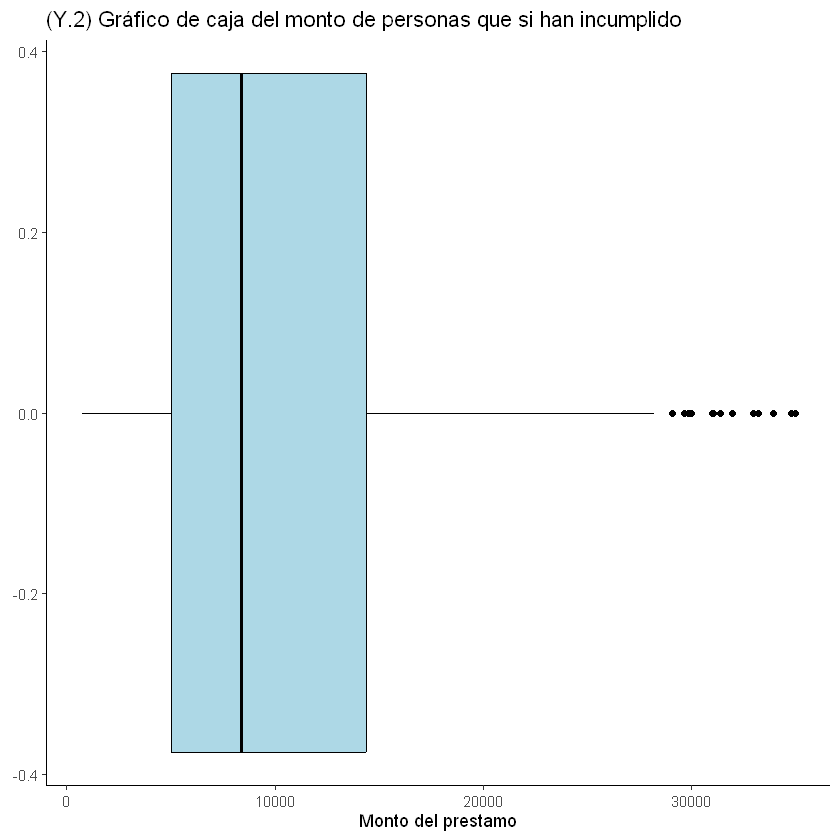

In [15]:
boxp_Y <- ggplot(df_Y, aes(x = loan_amnt)) +
  geom_boxplot(fill = "lightblue", color= "black") +
  theme_classic() + 
  labs(
    title = '(Y.2) Gráfico de caja del monto de personas que si han incumplido',
    x = 'Monto del prestamo'
  )

boxp_Y

El boxplot refuerza la conclusión de la asimetría positiva. La caja (que representa el rango intercuartílico, donde se encuentra el 50% central de los datos) está sesgada hacia los valores más bajos. La línea negra dentro de la caja, que representa la mediana, está notablemente más cerca del cuartil inferior, lo que confirma la asimetría a la derecha. Además, se aprecian numerosos puntos individuales en el lado derecho de la gráfica, más allá del "bigote" superior. Estos puntos representan valores atípicos (outliers), es decir, montos de préstamo inusualmente altos para este grupo. La presencia de estos valores atípicos es consistente con una distribución con una cola derecha larga y contribuye a la asimetría observada en el histograma.

##### **Q-Q plot (papel de probabilidad)**

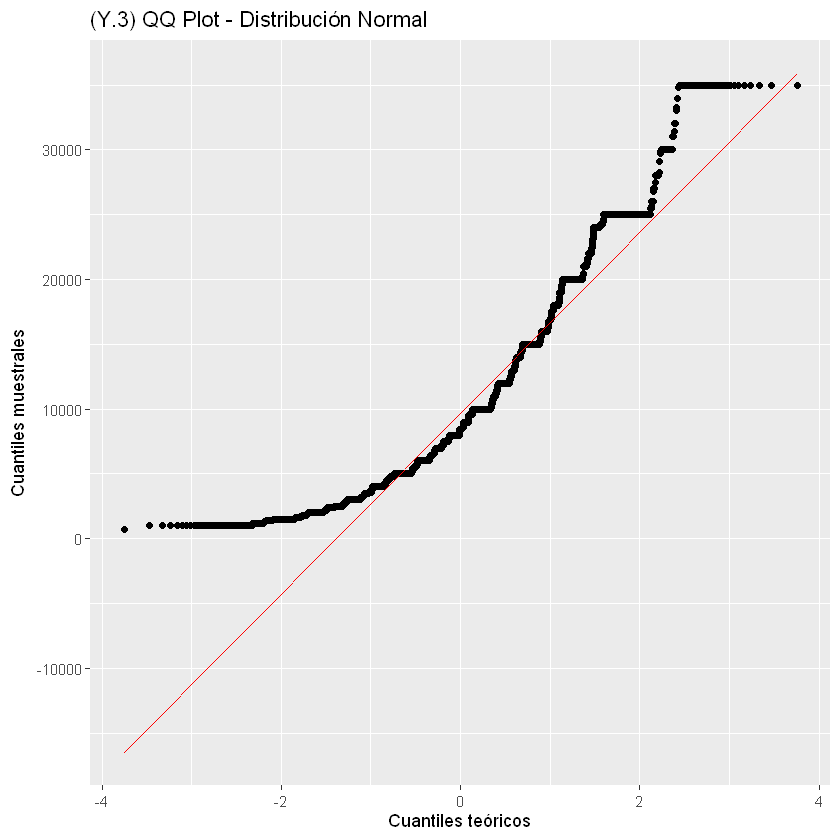

In [16]:
qqnormal_Y <- ggplot(df_Y, aes(sample = loan_amnt)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  labs(
    title = '(Y.3) QQ Plot - Distribución Normal',
    x = 'Cuantiles teóricos',
    y = 'Cuantiles muestrales'
  )

qqnormal_Y

Si los datos se distribuyeran normalmente, los puntos en el gráfico se alinearían aproximadamente a lo largo de la línea roja de 45 grados. En este QQ plot, se observa una desviación significativa de la línea recta, especialmente en los extremos, lo que sugiere que la distribución de los montos de préstamo para personas con historial de incumplimiento no es normal.

### **2.2. Monto de prestamos para personas que NO tienen algún incumplimiento historico**
#### **2.2.1. Estadisticas descriptivas que nos ayudan a entender la distribucion de los datos**

In [30]:
library(moments) # Calculo de curtosis y asimetria

df_N <- subset(df, cb_person_default_on_file == 'N')

media_N <- mean(df_N$loan_amnt)
mediana_N <- median(df_N$loan_amnt)
desv_est_N <- sd(df_N$loan_amnt)
curt_N <- kurtosis(df_N$loan_amnt)
asimetria_muestral_N <- skewness(df_N$loan_amnt)

cat("Media =", aplicar_formato(media_N), "\n")
cat("Mediana = ", aplicar_formato(mediana_N), "\n")
cat("Desviacion estandar = ", aplicar_formato(desv_est_N), "\n")
cat("Curtosis = ", curt_N, "\n")
cat("Asimetria muestral = ", asimetria_muestral_N)

Media = $9,475.06 
Mediana =  $8,000.00 
Desviacion estandar =  $6,196.56 
Curtosis =  4.581604 
Asimetria muestral =  1.220372

##### **Conclusiones**

- El valor de la asimetría muestral es 1.220372. Dado que es un valor positivo y notablemente distinto de cero, indica que la distribución está sesgada a la derecha (asimetría positiva). Esto significa que la cola de la distribución se extiende más hacia los valores de montos de préstamo más altos, mientras que la mayoría de los préstamos se concentran en valores más bajos. El hecho de que la Media (9475.056) sea mayor que la Mediana (8000) refuerza esta observación.
- El valor de la curtosis es 4.581604. Este valor positivo y relativamente alto (considerando que el exceso de curtosis para una distribución normal es 0) sugiere una distribución leptocúrtica. Esto implica que la distribución tiene picos más agudos y colas más pesadas (es decir, más valores extremos) en comparación con una distribución normal.

#### **2.2.2. Graficos para entender la distribucion de los datos**

##### **Gráfico de barras**

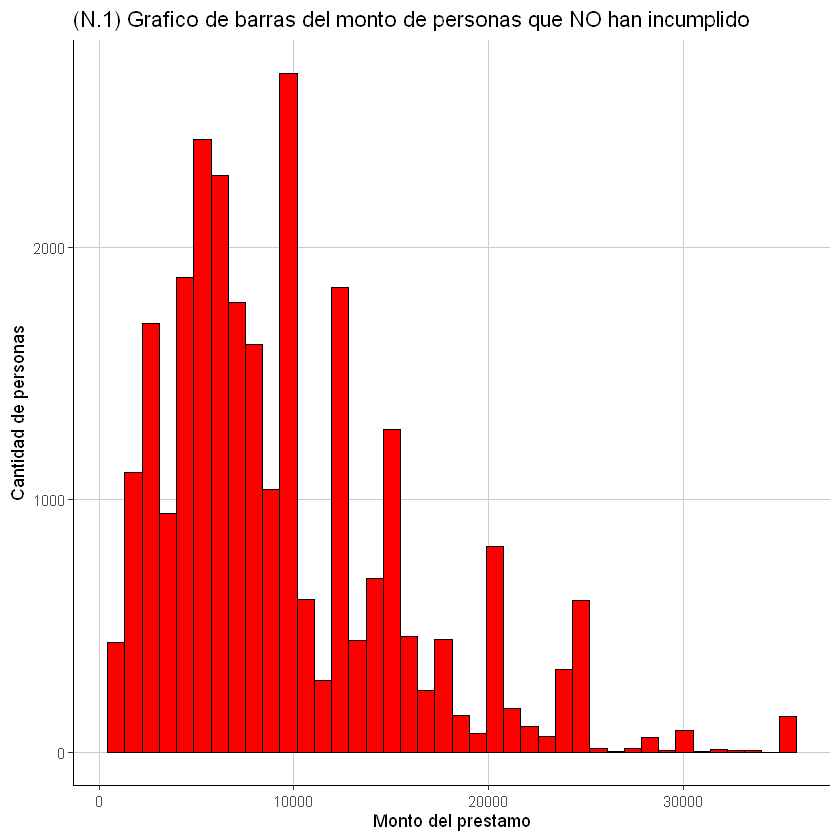

In [18]:
hist_N <- ggplot(df_N, aes(x = loan_amnt)) +
  geom_histogram(bins = 40, fill = "red", color = "black") +  # Color de barras y borde
  theme_classic() +  # Aplicar un tema clasico (con fondo blanco)
  theme(panel.grid.major = element_line(color = "gray80", size = 0.5)) + # Agregar cuadricula
  labs(
    title = '(N.1) Grafico de barras del monto de personas que NO han incumplido',
    x = 'Monto del prestamo',
    y = 'Cantidad de personas'
  )

hist_N

Se observa una clara asimetría positiva o sesgo a la derecha. La mayor concentración de personas se encuentra en los rangos de montos de préstamo más bajos (principalmente entre 0 y aproximadamente 10,000-12,000), con un pico notable alrededor de los 10,000. La frecuencia disminuye a medida que el monto del préstamo aumenta, aunque se perciben algunas aglomeraciones menores en montos más elevados (por ejemplo, cerca de 15,000 y 20,000). Esto sugiere que la mayoría de los préstamos sin incumplimiento son de montos menores, y los montos más grandes son menos comunes.

##### **Gráfico de caja**

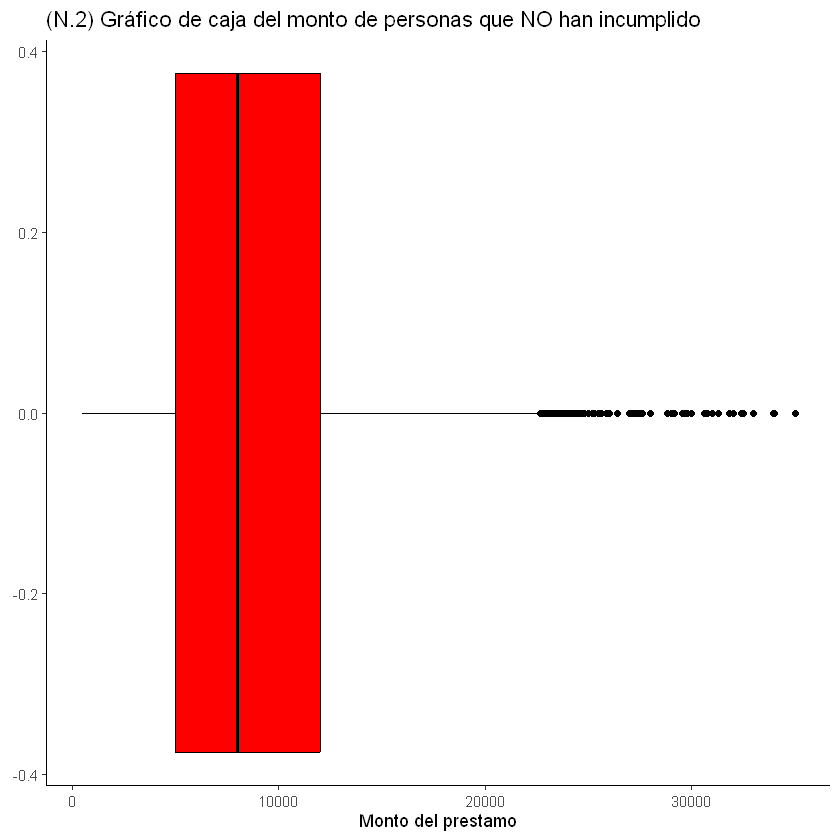

In [19]:
boxp_N <- ggplot(df_N, aes(x = loan_amnt)) +
  geom_boxplot(fill = "red", color= "black") +
  theme_classic() +
  labs(
    title = '(N.2) Gráfico de caja del monto de personas que NO han incumplido',
    x = 'Monto del prestamo'
  )

boxp_N

El boxplot corrobora la asimetría positiva. La caja (que engloba el 50% central de los datos) se encuentra sesgada hacia los valores inferiores. La línea negra que indica la mediana está más cercana al cuartil inferior, lo que confirma la asimetría a la derecha. Además, se aprecian numerosos puntos individuales al lado derecho de la gráfica, más allá del "bigote" superior. Estos puntos son valores atípicos (outliers), representando montos de préstamo inusualmente altos para este grupo. La presencia de estos valores atípicos es coherente con una distribución que posee una cola derecha larga y contribuye a la asimetría observada en el histograma.

##### **Q-Q plot (papel de probabilidad)**

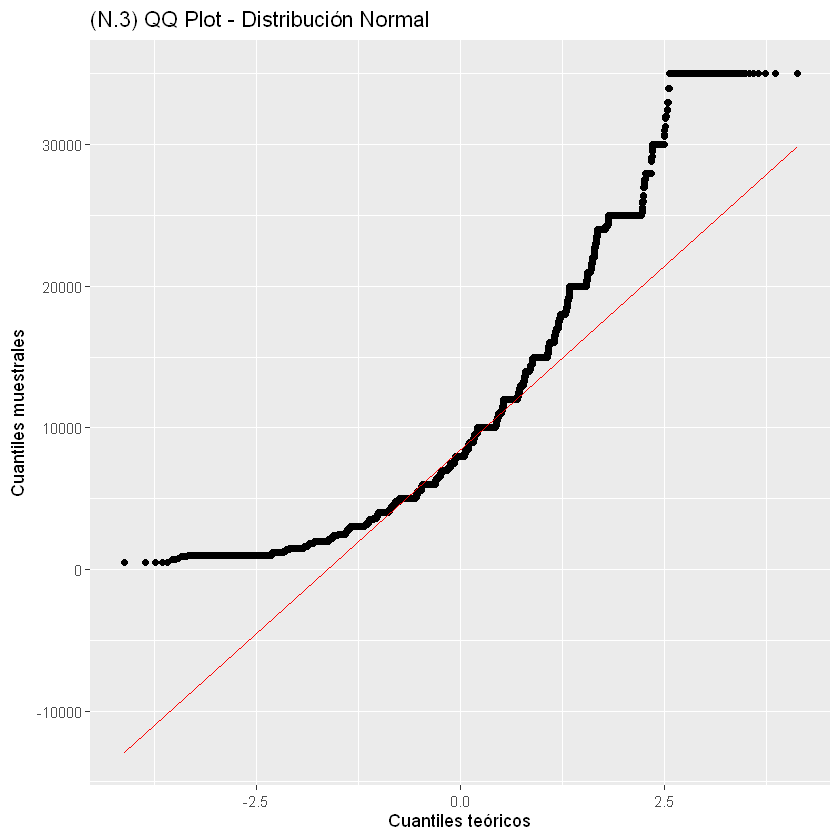

In [20]:
qqnormal_N <- ggplot(df_N, aes(sample = loan_amnt)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  labs(
    title = '(N.3) QQ Plot - Distribución Normal',
    x = 'Cuantiles teóricos',
    y = 'Cuantiles muestrales'
  )
  
qqnormal_N

En este QQ plot, se observa una desviación significativa de la línea recta, particularmente en los extremos. Los puntos en la parte inferior y superior del gráfico se curvan y se alejan de la línea. Esta curvatura y la clara separación de la línea de 45 grados indican que la distribución del monto del préstamo para este grupo no sigue una distribución normal.

## **3. Comparación de los montos promedio de los préstamos**

### **3.1. Opinión inicial (basada en la información anterior)**



Al calcular las medias muestrales, observamos una diferencia entre ambos grupos: la media del monto del préstamo para quienes sí han incumplido es de $10,123.36, mientras que para quienes no han incumplido es de $9,475.06. Esta diferencia de $648.30 entre las medias muestrales ya sugiere una posible distinción en los montos promedio.

Adicionalmente, notamos que la desviación estándar del grupo de personas que sí han incumplido ($6,853.53) es mayor que la de las que no han incumplido ($6,196.56). Esta mayor dispersión en los datos del grupo con historial de incumplimiento es un indicio importante, ya que a pesar de que la diferencia entre las medias muestrales puede parecer modesta en comparación con los valores de los préstamos, la mayor variabilidad en uno de los grupos podría influir en la significancia estadística de esa diferencia.

Por lo tanto, en mi opinión, no podemos afirmar con certeza que las medias poblacionales sean iguales basándonos únicamente en estas estadísticas descriptivas. La diferencia observada en las medias muestrales, sumada a las distintas dispersiones, nos lleva a considerar que las medias poblacionales podrían ser diferentes, aunque la magnitud de esa diferencia podría ser relativamente pequeña en proporción a los montos de préstamo involucrados.

### **3.2. Analisis con boxplots**

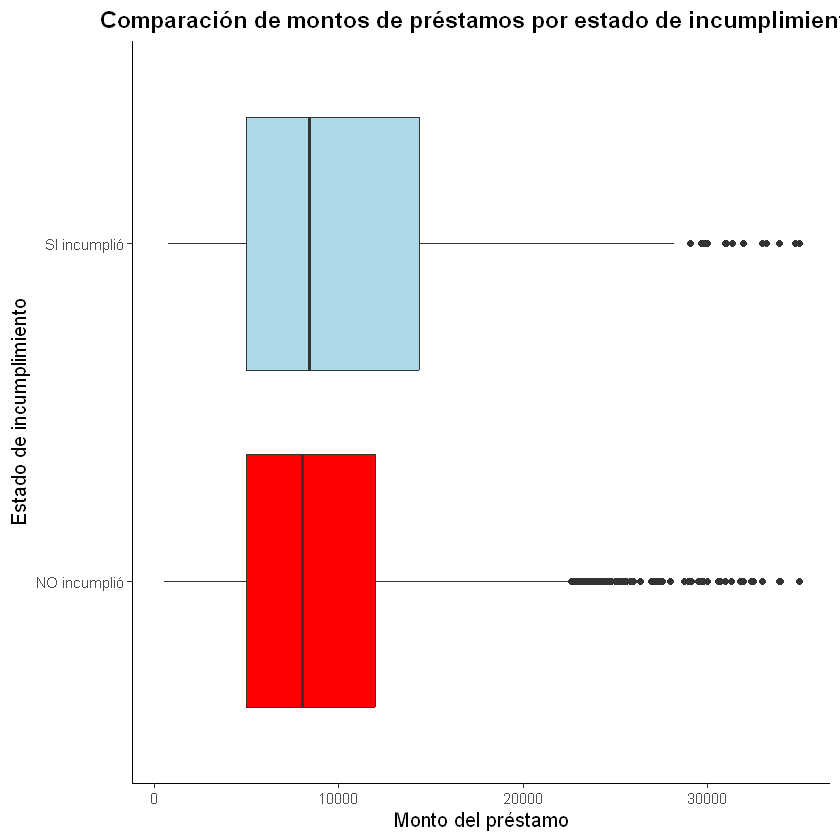

In [21]:
df_Y$grupo <- "SI incumplió"
df_N$grupo <- "NO incumplió"

# Combinar los dataframes
df_combinado <- rbind(df_Y, df_N)

# Crear el boxplot combinado
boxplot_combinado <- ggplot(df_combinado, aes(x = grupo, y = loan_amnt, fill = grupo)) +
  geom_boxplot() +
  coord_flip() +
  theme_classic() +
  labs(
    title = "Comparación de montos de préstamos por estado de incumplimiento",
    x = "Estado de incumplimiento",
    y = "Monto del préstamo"
  ) +
  scale_fill_manual(values = c("SI incumplió" = "lightblue", "NO incumplió" = "red")) +
  theme(
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
    axis.title = element_text(size = 12),
    legend.position = "none"
  )

boxplot_combinado

Visualmente, la mediana del grupo "SI incumplió" parece ser un poco más alta que la del grupo "NO incumplió". Sin embargo, el considerable solapamiento de las cajas y de los bigotes hace difícil determinar a simple vista si esta diferencia en las medianas es lo suficientemente grande como para inferir que las medias poblacionales son estadísticamente diferentes, por lo que si una es mayor que la otra, será por una diferencia pequeña que no es fácil de determinar a simple vista.

### **3.3. Analisis con intervalo de confianza**

Se hará un intervalo de confianza para la diferencia de las medias, en donde se usará el siguiente intervalo dado que el tamaño de la muestra es lo suficientemente grande para poder usar el teorema del límite central:
$$\left( (\bar{X} - \bar{Y}) - Z_{\frac{\alpha}{2}} \sqrt{\frac{S_x^2}{n_x} + \frac{S_y^2}{n_y}}, (\bar{X} - \bar{Y}) + Z_{\frac{\alpha}{2}} \sqrt{\frac{S_x^2}{n_x} + \frac{S_y^2}{n_y}} \right)$$

Para esta fórmula, consideremos dos grupos muestrales: el primero (**subíndice x**) corresponde a personas con historial de incumplimiento de pago, y el segundo (**subíndice y**) a aquellas sin dicho historial. De este modo:

* $\bar{X}$ y $\bar{Y}$ son las **medias muestrales** respectivas.
* $S_x$ y $S_y$ son las **desviaciones estándar muestrales** respectivas.
* $n_x$ y $n_y$ son los **tamaños de muestra** respectivos.
* $Z_{\alpha/2}$ es el **valor crítico** de la distribución normal estándar, correspondiente a un nivel de confianza del 95%.

In [22]:
dif_medias <- media_Y - media_N

nY <- length(df_Y$loan_amnt)
varianza_Y <- var(df_Y$loan_amnt)

nN <- length(df_N$loan_amnt)
varianza_N <- var(df_N$loan_amnt)

Z <- qnorm(0.975)

error <- Z * sqrt(varianza_Y/nY + varianza_N/nN)

intervalo <- c(dif_medias - error, dif_medias + error)

cat("Intervalo de confianza para la diferencia de las medias: (", intervalo[1], ", ", intervalo[2], ")")

Intervalo de confianza para la diferencia de las medias: ( 456.1993 ,  840.4078 )

Dado que el intervalo de confianza no contiene el cero, se concluye que existe una diferencia estadísticamente significativa entre las medias poblacionales de los montos de préstamo de ambos grupos (aquellos con y sin historial de incumplimiento). Ambos límites del intervalo son positivos, esto significa que la media de las personas con incumplimiento de pago es consistentemente mayor que la media de las personas que no tienen historial de incumplimiento.

# **4. Pruebas de hipótesis con un nivel de significancia del 5%**

### **4.1. Hipótesis**

Para esta prueba de hipótesis, se usarán las siguientes hipótesis:
- Hipótesis nula: **Ambas medias son iguales**
- Hipótesis alternativa: **Las medias son diferentes**

### **4.2. Tipo de prueba**

Se hará una prueba de hipótesis para poder comprobar los resultados anteriores, la cual se hará con un nivel de significancia del 5% y tiene la siguiente estructura:

$H_0: \mu_Y - \mu_N = 0$

$H_1: \mu_Y - \mu_N \neq 0$

Calculamos el estadístico de prueba:
$$t = \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{S_x^2}{n_x} + \frac{S_y^2}{n_y}}} \; \sim \; t_{\nu}$$

donde $\nu$ es el número de grados de libertad, que se calcula como:

$$\nu \approx \frac{\left(\frac{S_x^2}{n_x} + \frac{S_y^2}{n_y}\right)^2}{\frac{(S_x^2/n_x)^2}{n_x-1} + \frac{(S_y^2/n_y)^2}{n_y-1}}$$

y con una region de rechazo de la forma:

$$R = \{t: |t| > t_{\frac{\alpha}{2}, \nu}\}$$


### **4.3. Realización de la prueba**

In [23]:
nY <- length(df_Y$loan_amnt)
nN <- length(df_N$loan_amnt)

t_estadistico <- (media_Y - media_N) / sqrt(varianza_Y/nY + varianza_N/nN)

grados_libertad <- round(((varianza_Y/nY + varianza_N/nN)^2) / ((varianza_Y/nY)^2/(nY-1) + (varianza_N/nN)^2/(nN-1)))

t_critico <- qt(0.975, grados_libertad)

p_valor <- 2 * (1 - pt(abs(t_estadistico), grados_libertad))

cat("P-valor = ", format(p_valor, scientific = F), "\n")
cat("T-estadistico = ", t_estadistico, "\n")
cat("T-critico = ", t_critico, "\n")

if (abs(t_estadistico) > t_critico) {
  cat("Rechazamos la hipótesis nula. La diferencia entre las medias es significativa.")
} else {
  cat("No rechazamos la hipótesis nula. La diferencia entre las medias no es significativa.")
}

P-valor =  0.00000000003974554 
T-estadistico =  6.614387 
T-critico =  1.960265 
Rechazamos la hipótesis nula. La diferencia entre las medias es significativa.

Este resultado es totalmente consistente con la conclusión que obtuvimos del intervalo de confianza del 95% (456.1993, 840.4078). Ambos métodos nos llevan a la misma conclusión: las medias poblacionales de los montos de préstamo de ambos grupos no son iguales. La prueba de hipótesis formaliza esta conclusión con un nivel de significancia específico.